# Kaggle Survey Data (2017–2021)

In this project, we worked on the **Kaggle Data Science Survey (2017–2021)**.  
The dataset included responses from data professionals worldwide and required **extensive cleaning** due to missing values, inconsistent categories, and formatting issues.  

After cleaning and encoding, we generated **summary statistics and visual insights** to understand trends in:
- **Demographics** (age, gender, country, education)  
- **Professional roles** and experience levels  
- **Time-related patterns** (survey duration, changes across years)  

Finally, we extracted the **top 5 insights** that highlight community trends and respondent behaviors.  


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

use_cols = [
    "-",
    "Time from Start to Finish (seconds)",
    "Q1", "Q2", "Q3", "Q4", "Q5", "Q6"
]

df = pd.read_csv(
    "C:\\Users\\Fame\\Documents\\DATA  ANALYSIS\\Datasets\\kaggle_survey_2017_2021.csv", 
    usecols=use_cols
)
df.head(10)

C:\Users\Fame\AppData\Local\Temp\ipykernel_268\742032302.py:12: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years
5,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years
6,2021,1020,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years
7,2021,141,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years
8,2021,484,30-34,Man,India,Bachelorâ€™s degree,Data Scientist,5-10 years
9,2021,1744,22-24,Man,Russia,Bachelorâ€™s degree,Currently not employed,3-5 years


###  Step 1: Renaming Columns & Removing Metadata Row  

The original dataset contained verbose question texts (e.g., *"What is your age (# years)?"*).  
To make the data easier to handle, we **renamed columns** into concise labels such as `Age`, `Gender`, `Country`, `Education`, etc.  

Additionally, the **first row contained survey metadata** (the question texts themselves), so we removed it to keep only actual responses.  


In [82]:
df.rename(columns={
    "-": "Year",
    "Time from Start to Finish (seconds)": "Duration_sec",
    "Q1": "Age",
    "Q2": "Gender",
    "Q3": "Country",
    "Q4": "Education",
    "Q5": "JobRole",
    "Q6": "CodingExperience"
}, inplace=True)

df = df.drop(0).reset_index(drop=True)
print(df.head(10))

   Year Duration_sec    Age Gender    Country  \
0  2021          910  50-54    Man      India   
1  2021          784  50-54    Man  Indonesia   
2  2021          924  22-24    Man   Pakistan   
3  2021          575  45-49    Man     Mexico   
4  2021          781  45-49    Man      India   
5  2021         1020  25-29  Woman      India   
6  2021          141  18-21  Woman      India   
7  2021          484  30-34    Man      India   
8  2021         1744  22-24    Man     Russia   
9  2021          655  30-34    Man     Turkey   

                                           Education                  JobRole  \
0                                Bachelorâ€™s degree                    Other   
1                                  Masterâ€™s degree  Program/Project Manager   
2                                  Masterâ€™s degree        Software Engineer   
3                                    Doctoral degree       Research Scientist   
4                                    Doctoral degree   

###  Step 2: Cleaning Categorical Columns & Handling Missing Data  

- **Gender Standardization**:  
  The dataset contained multiple variations of gender labels (e.g., *"Man"*, *"Woman"*, *"Nonbinary"*).  
  We mapped them into consistent categories: `Male`, `Female`, `Non-binary`, and `Other`.  

- **Education Standardization**:  
  Education levels had inconsistent formats (e.g., *"Bachelor’s degree"* appeared with different encodings).  
  We unified them into categories such as `Bachelors`, `Masters`, `PhD`, `Professional`, `Some College`, `High School`, and `Other`.  

- **Missing Value Handling**:  
  - `Age`, `Gender`, `Education`, `Country`, `JobRole`, and `CodingExperience` → filled with `"Unknown"` or `"Other"`.  
  - `Duration_sec` → replaced with the median survey completion time.  

- **Type Conversion**:  
  Converted `Year` and `Duration_sec` into integers for proper numerical analysis.  

✅ After this step, the dataset had **no missing values** in key demographic columns, ensuring consistency for further analysis.  


In [83]:
# Clean Gender
df["Gender"] = df["Gender"].replace({
    "Man": "Male",
    "Woman": "Female",
    "Nonbinary": "Non-binary",
    "Non-binary, genderqueer, or gender non-conforming": "Non-binary",
    "Prefer not to say": "Other",
    "Prefer to self-describe": "Other",
    "A different identity": "Other"
})

# Clean Education
df["Education"] = df["Education"].replace({
    "Bachelorâ€™s degree": "Bachelors",
    "Bachelor's degree": "Bachelors",

    "Masterâ€™s degree": "Masters",
    "Master's degree" : "Masters",

    "Doctoral degree": "PhD",
    "Professional doctorate": "PhD",
    "Some college/university study without earning a bachelorâ€™s degree": "Some College",
    "Some college/university study without earning a bachelor's degree": "Some College",
    "Professional degree": "Professional",
    "I did not complete any formal education past high school": "High School",
    "No formal education past high school":"High School",
    "I prefer not to answer": "Other"
})

# Fill missing values
df["Age"] = df["Age"].fillna("Unknown")
df["Gender"] = df["Gender"].fillna("Other")
df["Education"] = df["Education"].fillna("Other")
df["Country"] = df["Country"].fillna("Unknown")
df["JobRole"] = df["JobRole"].fillna("Other")
df["Duration_sec"] = df["Duration_sec"].fillna(df["Duration_sec"].median())
df["CodingExperience"] = df["CodingExperience"].fillna("Unknown")

# Convert types
df["Year"] = df["Year"].astype(int)
df["Duration_sec"] = df["Duration_sec"].astype(int)

print("Shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())

print(df.head(20))

Shape: (106301, 8)

Missing values:
 Year                0
Duration_sec        0
Age                 0
Gender              0
Country             0
Education           0
JobRole             0
CodingExperience    0
dtype: int64
    Year  Duration_sec    Age  Gender    Country     Education  \
0   2021           910  50-54    Male      India     Bachelors   
1   2021           784  50-54    Male  Indonesia       Masters   
2   2021           924  22-24    Male   Pakistan       Masters   
3   2021           575  45-49    Male     Mexico           PhD   
4   2021           781  45-49    Male      India           PhD   
5   2021          1020  25-29  Female      India         Other   
6   2021           141  18-21  Female      India  Some College   
7   2021           484  30-34    Male      India     Bachelors   
8   2021          1744  22-24    Male     Russia     Bachelors   
9   2021           655  30-34    Male     Turkey         Other   
10  2021          1777  40-44    Male  Australia

### Step 3: Encoding Age & Experience  

- Converted **Age ranges** into numeric midpoints (e.g., 18–21 → 19.5, 70+ → 75).  
- Standardized and mapped **Coding Experience** into numeric values (e.g., <1 year → 0.5, 3–5 years → 4, 20+ years → 23).  
- Special categories like *Unknown* or *I don’t write code* were encoded as 0.  

➡️ Final columns created: `Age_num` and `Experience_num` for analysis.  


In [84]:
import re
sns.set(style="whitegrid")

# ----- AGE: enforce order + midpoint for numeric proxy -----
age_order = [
    "Under 18","18-21","22-24","25-29","30-34","35-39",
    "40-44","45-49","50-54","55-59","60-69","70+","Prefer not to say","Unknown"
]
df["Age"] = pd.Categorical(df["Age"], categories=[a for a in age_order if a in df["Age"].unique()], ordered=True)

def age_to_midpoint(x: str):
    if pd.isna(x): return np.nan
    x = str(x)
    m = re.match(r"^\s*(\d+)\s*-\s*(\d+)\s*$", x)
    if m:
        a,b = int(m.group(1)), int(m.group(2))
        return (a+b)/2
    if x == "Under 18": return 17
    if x == "70+": return 75
    return np.nan

df["Age_num"] = df["Age"].map(age_to_midpoint)
df["Age_num"] = pd.to_numeric(df["Age_num"], errors="coerce")
df["Age_num"] = df["Age_num"].fillna(df["Age_num"].median())

# ----- EXPERIENCE: Clean, Standardize, Encode -----

# ----- EXPERIENCE: Clean and Map -----

exp_map = {
    "< 1 years": 0.5,
    "Less than a year": 0.5,

    "1 to 2 years": 1.5,
    "1-2 years": 1.5,
    "1-3 years": 2,

    "3 to 5 years": 4,
    "3-5 years": 4,

    "5-10 years": 7.5,
    "6 to 10 years": 8,   # slightly higher midpoint

    "10-20 years": 15,
    "20+ years": 23,
    "20-30 years": 25,
    "30-40 years": 35,
    "40+ years": 45,
    "More than 10 years": 15,  # conservative midpoint

    "I don't write code to analyze data": 0,
    "I have never written code": 0,
    "I have never written code but I want to learn": 0,
    "I have never written code and I do not want to learn": 0,

    "Unknown": 0
}

df["Experience_num"] = df["CodingExperience"].map(exp_map).fillna(0)

print("Shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())


Shape: (106301, 10)

Missing values:
 Year                0
Duration_sec        0
Age                 0
Gender              0
Country             0
Education           0
JobRole             0
CodingExperience    0
Age_num             0
Experience_num      0
dtype: int64


### Step 4: Summary Statistics & Distributions  

- Generated **basic distributions** for key variables:  
  - Yearly respondent counts  
  - Gender distribution (%)  
  - Top 10 Countries  
  - Education levels (%)  
  - Top 10 Job Roles  
  - Coding Experience distribution (%)  

- Created **year-wise breakdowns**:  
  - Respondents by **Year × Gender**  
  - Median **Experience (years)** by Year  
  - Median **Survey Duration (seconds)** by Year  

➡️ This step provides a clear overview of the dataset and highlights major demographic and behavioral patterns.  


In [85]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())

# basic categorical distributions
summaries = {
    "Year counts": df["Year"].value_counts().sort_index(),
    "Gender (%)": (df["Gender"].value_counts(normalize=True)*100).round(1),
    "Top 10 Countries": df["Country"].value_counts().head(10),
    "Education (%)": (df["Education"].value_counts(normalize=True)*100).round(1),
    "Roles (top 10)": df["JobRole"].value_counts().head(10),
    "Experience (%)": (df["CodingExperience"].value_counts(normalize=True)*100).round(1)
}
for title, s in summaries.items():
    print(f"\n--- {title} ---")
    print(s)

# by-year breakdowns
by_year_gender = (df.pivot_table(index="Year", columns="Gender", values="JobRole", aggfunc="count").fillna(0)).astype(int)
by_year_exp = df.groupby("Year")["Experience_num"].median().round(1)
by_year_dur = df.groupby("Year")["Duration_sec"].median().astype(int)

print("\n--- Respondents by Year x Gender ---")
print(by_year_gender)
print("\n--- Median Experience (yrs) by Year ---")
print(by_year_exp)
print("\n--- Median Survey Duration (sec) by Year ---")
print(by_year_dur)


Shape: (106301, 10)

Missing values:
 Year                0
Duration_sec        0
Age                 0
Gender              0
Country             0
Education           0
JobRole             0
CodingExperience    0
Age_num             0
Experience_num      0
dtype: int64

--- Year counts ---
Year
2017    16716
2018    23859
2019    19717
2020    20036
2021    25973
Name: count, dtype: int64

--- Gender (%) ---
Gender
Male          80.5
Female        17.7
Other          1.7
Non-binary     0.2
Name: proportion, dtype: float64

--- Top 10 Countries ---
Country
India                                                   25192
United States of America                                12688
Other                                                    5771
United States                                            4197
China                                                    3506
Russia                                                   3407
Brazil                                                   3374
Jap

## Getting Insights

### Respondents by Gender over Years

C:\Users\Fame\AppData\Local\Temp\ipykernel_268\615191315.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_pcts = gender_counts.groupby("Year").apply(lambda x: x.assign(Percent=x["Count"]/x["Count"].sum()*100))


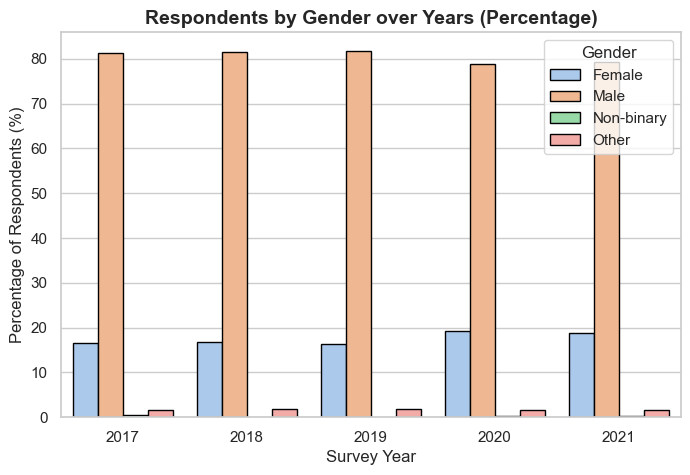

In [86]:

plt.figure(figsize=(8,5))
gender_counts = df.groupby(["Year","Gender"]).size().reset_index(name="Count")
gender_pcts = gender_counts.groupby("Year").apply(lambda x: x.assign(Percent=x["Count"]/x["Count"].sum()*100))

sns.barplot(data=gender_pcts, x="Year", y="Percent", hue="Gender", palette="pastel", edgecolor="black")

plt.title("Respondents by Gender over Years (Percentage)", fontsize=14, fontweight="bold")
plt.xlabel("Survey Year")
plt.ylabel("Percentage of Respondents (%)")
plt.legend(title="Gender")
plt.show()


#### 📊 Graph Interpretation

- **Male respondents** consistently made up the majority of survey participants across all years, ranging from about **78% to 82%**.
- The percentage of **female respondents** remained relatively stable but showed a slight increase over time, from around **16% in 2017** to just under **20% in 2021**.
- The proportion of **non-binary respondents** appears to be negligible or unreported throughout the years.
- The **"Other"** gender category shows a very small but consistent presence (~1–2%) each year.
- Despite gradual improvements, **gender diversity remains skewed**, highlighting ongoing underrepresentation of genders other than male in the field.


### Median Coding Experience by Year

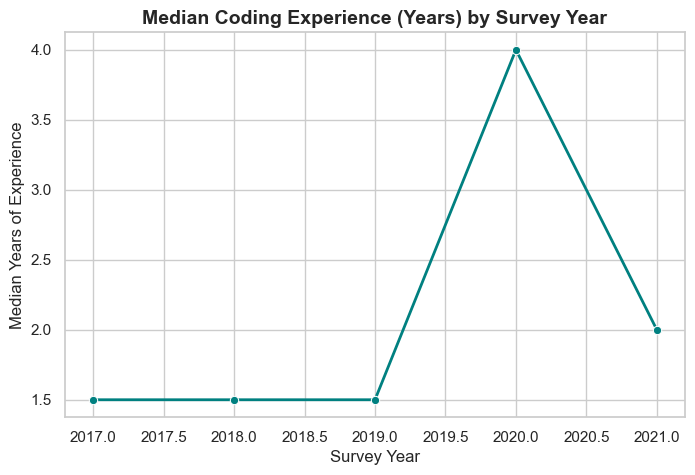

In [87]:
plt.figure(figsize=(8,5))
sns.lineplot(x=by_year_exp.index, y=by_year_exp.values, marker="o", linewidth=2, color="teal")

plt.title("Median Coding Experience (Years) by Survey Year", fontsize=14, fontweight="bold")
plt.xlabel("Survey Year")
plt.ylabel("Median Years of Experience")
plt.show()


#### 💻 Graph Interpretation

- From **2017 to 2019**, the median coding experience remained consistent at approximately **1.5 years**.
- In **2020**, there was a **significant spike** in coding experience, with the median rising to **4 years** — more than double the previous years.
- By **2021**, the median coding experience **dropped sharply to 2 years**, though still higher than the pre-2020 levels.
- This spike in 2020 may indicate a shift in the respondent demographic, possibly due to the impact of the COVID-19 pandemic leading to more experienced professionals participating or a change in survey outreach.


### Top 5 Countries of Respondents

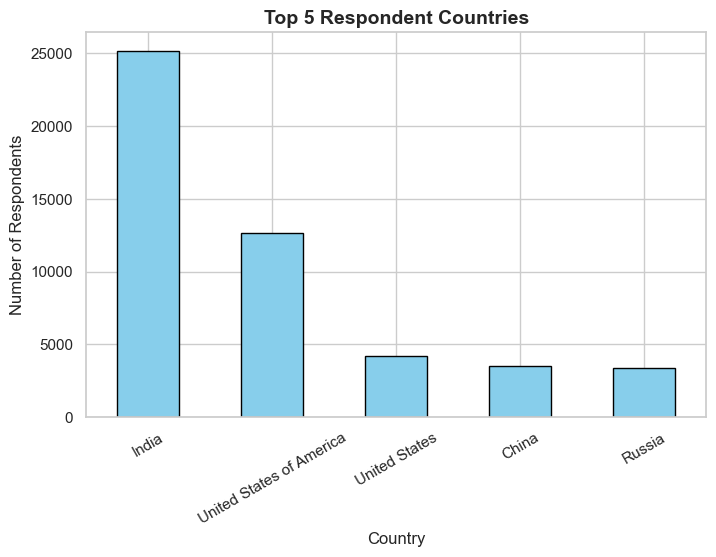

In [95]:
plt.figure(figsize=(8,5))

(df[df["Country"]!= "Other"]["Country"].value_counts().head(5).plot(kind="bar", color="skyblue", edgecolor="black"))

plt.title("Top 5 Respondent Countries", fontsize=14, fontweight="bold")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=30)
plt.show()


#### 🌍 Graph Interpretation

- **India** had the highest number of survey respondents by a large margin, with over **25,000 participants**.
- The **United States of America** followed as the second-largest contributor, with approximately **13,000 respondents**.
- Interestingly, **"United States"** appears as a separate entry, likely due to data inconsistency — these two should ideally be combined for accuracy.
- **China** and **Russia** rounded out the top five, each contributing between **3,000–4,000 respondents**.
- The dominance of India and the USA (combined) suggests strong participation from English-speaking countries with large tech communities.


### Job Role Distribution (Top 8)

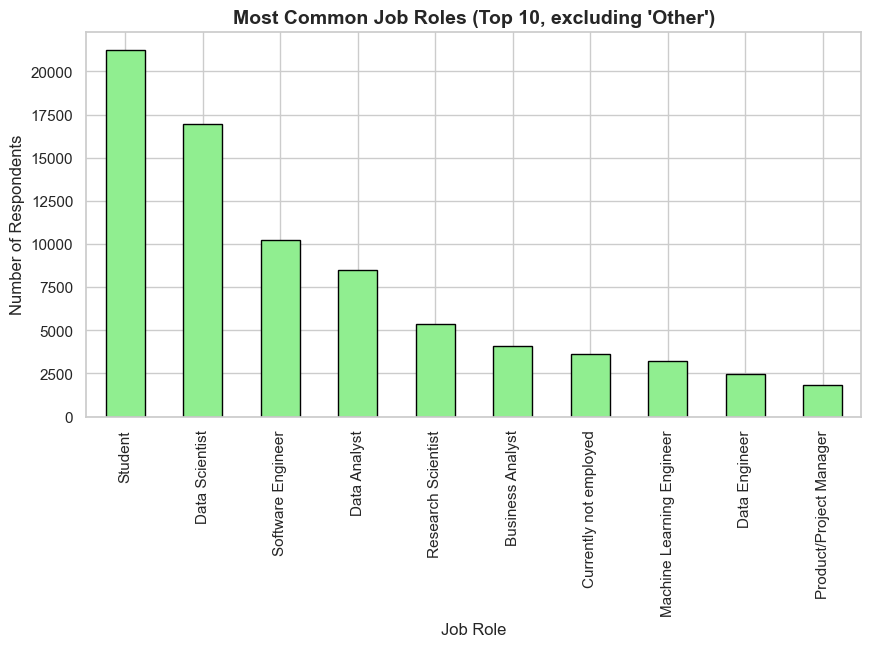

In [91]:
plt.figure(figsize=(10,5))

(df[df["JobRole"]!="Other"]["JobRole"]
   .value_counts()
   .head(10)
   .plot(kind="bar", color="lightgreen", edgecolor="black"))

plt.title("Most Common Job Roles (Top 10, excluding 'Other')", fontsize=14, fontweight="bold")
plt.xlabel("Job Role")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=90)
plt.show()


#### 👔 Graph Interpretation

- **Student** is the most common job role among respondents, with over **21,000** participants identifying as such.
- **Data Scientist** follows as the top professional role, with around **17,000 respondents**.
- **Software Engineer** and **Data Analyst** are also highly represented, showing the strong tech and data-oriented nature of the audience.
- Roles like **Research Scientist**, **Business Analyst**, and **Machine Learning Engineer** indicate a significant presence of both academic and applied data roles.
- **Data Engineer** and **Product/Project Manager** round out the top 10, showing some diversity in technical and managerial roles.
- The exclusion of the vague **"Other"** category improves clarity and ensures more actionable insights.


### Education Background of Respondents

C:\Users\Fame\AppData\Local\Temp\ipykernel_268\1975164268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Education", order=df["Education"].value_counts().index, palette="muted")


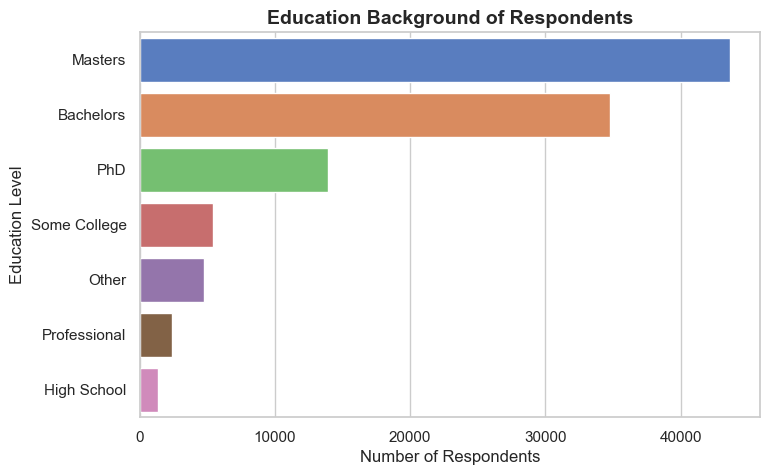

In [90]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y="Education", order=df["Education"].value_counts().index, palette="muted")

plt.title("Education Background of Respondents", fontsize=14, fontweight="bold")
plt.xlabel("Number of Respondents")
plt.ylabel("Education Level")
plt.show()


#### 🎓 Graph Interpretation

- The majority of respondents hold a **Master’s degree**, with over **44,000** individuals, making it the most common education level.
- **Bachelor’s degree** holders are the second-largest group, with approximately **35,000 respondents**.
- Around **13,000 respondents** reported having a **PhD**, indicating a strong academic presence in the dataset.
- Smaller groups include those with **Some College** experience, **Professional degrees**, and **High School** education.
- The **"Other"** category is relatively small, suggesting most respondents fit within standard academic pathways.
- Overall, the data shows that the field is highly educated, with the majority of professionals having at least a **Bachelor’s degree** or higher.


### Median Survey Duration Over Time

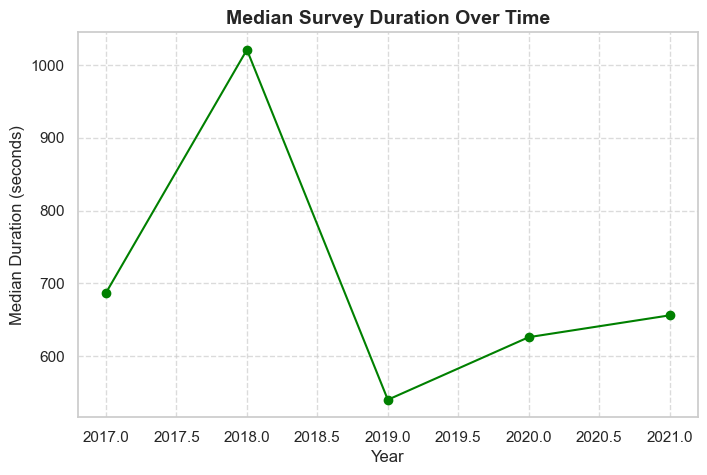

In [96]:
plt.figure(figsize=(8,5))
df.groupby("Year")["Duration_sec"].median().plot(kind="line", marker="o", color="green")

plt.title("Median Survey Duration Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Median Duration (seconds)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#### ⏱️ Graph Interpretation

- In **2017**, the median survey duration was approximately **690 seconds**.
- This sharply increased in **2018**, peaking at just over **1000 seconds**, indicating a longer or more detailed survey that year.
- A dramatic drop occurred in **2019**, where the duration fell to around **540 seconds**, the lowest in the five-year span.
- From **2020 to 2021**, survey durations gradually increased again, reaching around **660 seconds** by 2021.
- These fluctuations could reflect changes in survey design, length, or respondent engagement over the years.


## Exective Summary  

In this project, we worked with the **Kaggle Data Science Survey (2017–2021)** dataset to explore global trends in the data science community.  
The main steps included:  

1. **Data Cleaning** – fixing missing values, removing inconsistencies, and standardizing categorical responses (Gender, Education, Coding Experience).  
2. **Encoding** – converting ranges (Age, Coding Experience) into numerical values for analysis.  
3. **Exploratory Analysis** – generating distributions, trends, and comparisons across years.  
4. **Insight Generation** – identifying patterns in demographics, education, job roles, coding experience, and survey behavior.  

The analysis revealed that most respondents come from India and the USA, hold **Bachelor’s or Master’s degrees**, and commonly work as **Data Scientists or Students**.  
Over time, respondents reported **increasing coding experience** while the **survey completion duration decreased**, suggesting a more experienced and engaged community.  

This project demonstrates how effective **data cleaning and categorical handling** can lead to meaningful insights from complex survey data.  
